In [2]:
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [3]:
# data
data = pd.read_csv("train.csv")
Y_train = data["Y"]
data.drop("Y", axis=1, inplace=True)
data["Bias"] = 1
X_train = np.asmatrix(data)
Y_train = np.asmatrix(Y_train).transpose()


In [4]:
data = pd.DataFrame()
data = pd.read_csv("test.csv")
data["Bias"] = 1
X_test = np.asmatrix(data)

In [5]:
def fit(X, Y):
    # Y = mX , m = 1 + x1 + x2 + ...+ xn
    m = np.linalg.inv(X.transpose() * X) * X.transpose() * Y
    return m

m = fit(X_train, Y_train)

In [6]:
# Cost = Sum( (Y - Y_pred)^2 ) / N
def cost(X, Y, m):
    a = (Y - (m.transpose() * X.transpose() ))
    return (a*a.transpose()).mean()
cst = cost(X_train,Y_train, m)

In [7]:
def predict(X, m):
    return X * m

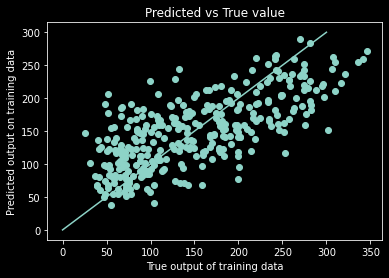

Score on training data 0.49572080558056053
Cost is 964802.7791765542


In [8]:
Y_pred = predict(X_train, m)
x = np.array(Y_train).reshape(-1)
y = np.array(Y_pred).reshape(-1)
plt.style.use('dark_background')
plt.scatter(x, y)
plt.plot([0, 300], [0, 300])
plt.xlabel("True output of training data")
plt.ylabel("Predicted output on training data")
plt.title("Predicted vs True value")
plt.show()

def score(X, Y):
    Y = np.array(Y).reshape(-1)
    Y_pred = predict(X, m)
    Y_pred = np.array(Y_pred).reshape(-1)
    score =  1 - (( ((Y_pred-Y)**2).sum() )/ ( ((Y - Y.mean())**2).sum() )) 
    return score

print("Score on training data", score(X_train, Y_train))
print("Cost is", cst)